In [43]:
import pandas as pd
import numpy as np
import pickle
from sklearn import linear_model

In [44]:
#loading and separating our sensor dataset into labels and features
data = pd.read_csv('../data/containerData.csv', delimiter=",")
data.head()


,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Amp,CumulativePowerConsumption,ContentType,Humidity,CO2,Door_Open,Maintainence_Required,Defrost_Cycle
0,2019-03-14 T14:33 Z,1369,3.458820,4.4,5.275047,11.764738,1,14.387285,12.138588,1,0,6
1,2019-03-14 T14:48 Z,1369,3.022719,4.4,1.400493,9.537408,5,21.920753,17.886931,1,0,6
2,2019-03-14 T15:03 Z,1369,3.281967,4.4,3.369944,7.654315,4,16.095776,19.355051,1,0,6
3,2019-03-14 T15:18 Z,1369,4.228575,4.4,2.890171,8.830114,5,6.040675,19.146473,1,0,6
4,2019-03-14 T15:33 Z,1369,3.251076,4.4,2.307239,11.929715,5,19.069065,2.534663,1,0,6


In [45]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline




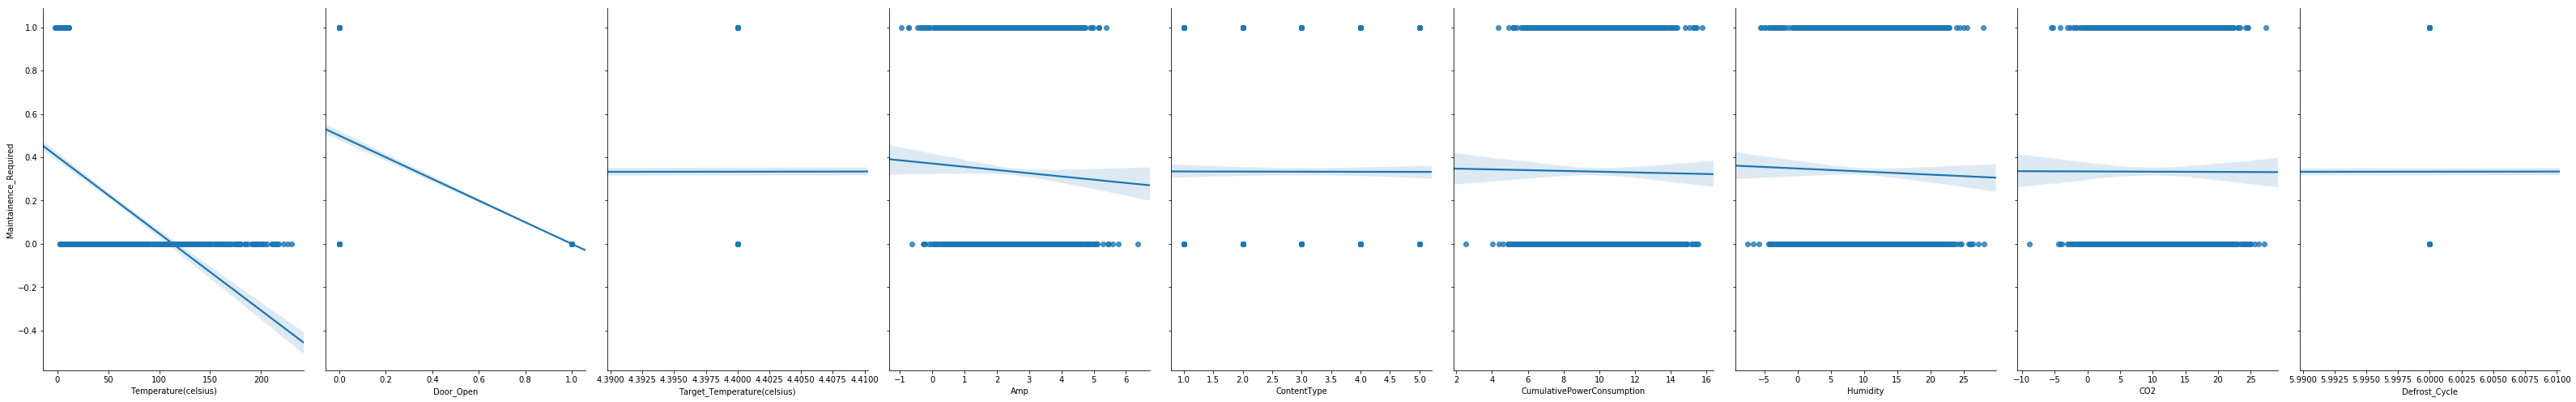

In [46]:
sns.pairplot(data, x_vars=['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle'], y_vars='Maintainence_Required', size=7, aspect=0.7, kind='reg')









In [47]:
# create a Python list of feature names
feature_cols = ['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['Temperature(celsius)', 'Door_Open','Target_Temperature(celsius)','Amp','ContentType','CumulativePowerConsumption'
                          ,'Humidity','CO2','Defrost_Cycle']]

# print the first 5 rows
X.head()

,Temperature(celsius),Door_Open,Target_Temperature(celsius),Amp,ContentType,CumulativePowerConsumption,Humidity,CO2,Defrost_Cycle
0,3.458820,1,4.4,5.275047,1,11.764738,14.387285,12.138588,6
1,3.022719,1,4.4,1.400493,5,9.537408,21.920753,17.886931,6
2,3.281967,1,4.4,3.369944,4,7.654315,16.095776,19.355051,6
3,4.228575,1,4.4,2.890171,5,8.830114,6.040675,19.146473,6
4,3.251076,1,4.4,2.307239,5,11.929715,19.069065,2.534663,6


In [48]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(3000, 9)


In [49]:
# select a Series from the DataFrame
y = data['Maintainence_Required']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Maintainence_Required

# print the first 5 values
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Maintainence_Required, dtype: int64

In [50]:
# import  
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [51]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 9)
(750, 9)
(2250,)
(750,)


In [52]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


#serializing our model to a file called model.pkl
pickle.dump(linreg, open("model.pkl","wb"))



In [38]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.5769547821387004
[ 1.66357091e-04 -5.09091494e-01  1.11022302e-16 -6.02904060e-03
 -6.99223860e-03 -2.26533309e-03  1.20590306e-04 -1.77654857e-03
  0.00000000e+00]


In [53]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)


In [54]:
y_pred

array([ 4.79010746e-01,  4.98326350e-01,  4.88221258e-01,  4.81332114e-01,
        4.87766529e-01, -1.01398191e-02, -5.45093190e-03, -2.23572869e-02,
        1.28538981e-02,  5.30758278e-01,  5.17686412e-01,  4.64455091e-01,
        5.13061939e-01,  4.72649030e-01, -1.23838825e-02,  4.93555662e-01,
       -6.50453131e-03,  4.89786113e-01,  4.91858314e-01,  4.97309780e-01,
        4.87746512e-01, -1.49610181e-02, -1.72247811e-02,  4.72953321e-01,
        4.71788108e-01,  2.22198256e-04,  5.20548028e-01,  5.43810354e-01,
        5.77070473e-03,  2.89947662e-02,  4.77091302e-01,  4.84348113e-01,
        1.45770296e-02,  5.04495449e-01,  5.03613665e-01,  2.01001673e-02,
        4.95861823e-01, -2.36575846e-02,  5.04987791e-01,  5.03791859e-01,
        5.15649616e-01, -1.52335901e-02,  5.24889918e-01, -2.39135952e-03,
        1.30037688e-02, -1.06799862e-02,  4.86167803e-01,  4.79236911e-01,
        5.18691559e-01, -2.11135260e-02,  5.09105759e-01,  5.04355317e-01,
        5.13620361e-01, -

In [55]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


0.4090401728472177


In [56]:
X_test

,Temperature(celsius),Door_Open,Target_Temperature(celsius),Amp,ContentType,CumulativePowerConsumption,Humidity,CO2,Defrost_Cycle
1957,3.463212,0,4.4,2.412767,3,11.955772,13.935976,21.160984,6
2087,5.017092,0,4.4,2.992995,2,10.101867,10.671864,14.543100,6
1394,3.969715,0,4.4,1.919843,3,13.450710,11.377154,15.616810,6
1520,4.305916,0,4.4,3.126019,4,10.951729,2.996328,14.114530,6
1098,3.704445,0,4.4,2.430930,4,10.039689,10.698348,14.481036,6
393,16.369783,1,4.4,3.400709,5,6.141354,14.789313,7.392629,6
28,3.665787,1,4.4,1.898408,5,10.256575,17.176475,3.576618,6
99,4.917600,1,4.4,1.650248,5,12.273462,10.192435,11.006552,6
351,17.618059,1,4.4,1.302031,2,8.513286,10.463797,10.178279,6
2020,5.041126,0,4.4,0.818172,1,8.855070,16.774059,9.610324,6
